In [1]:
import numpy as np
import matplotlib.pylab as plt
import math
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
import scipy.io
import RLS
f = scipy.io.loadmat('RLS_DATA.mat')
delay = 300
vars = f.keys()

data_size = f.get("RX_I").size

RX_Q_data = f.get("RX_Q")
RX_I_data = f.get("RX_I")
TX_Q_data = f.get("TX_Q")
TX_I_data = f.get("TX_I")

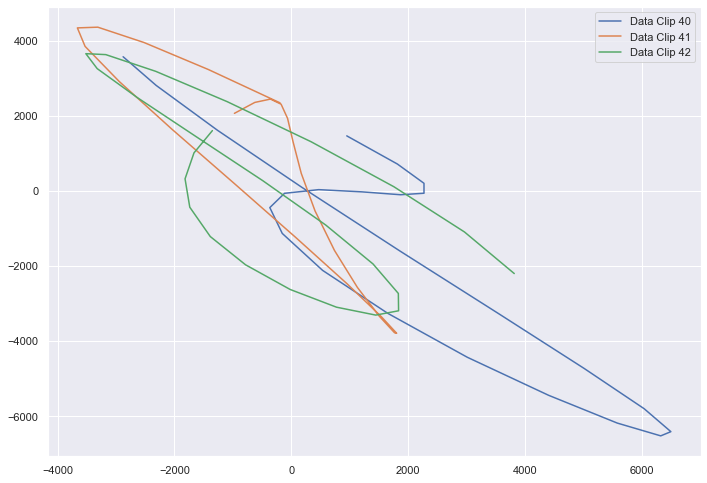

In [3]:
est_per = 25
num_test = 3
inital_clip = 40
end_clip = inital_clip+num_test

line_refernce = np.linspace(0,est_per,est_per)

for i in range (inital_clip,end_clip):
    plt.plot(TX_Q_data[i*est_per:(i+1)*(est_per)],RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay],    label='Data Clip {}'.format(i))  

#plt.step(line_refernce,np.squeeze(every_pure_input).T[0:test_size][0],label='Pure_Input')      
#plt.step(line_refernce, every_input[0:test_size],label='Curropted Signal') 
#plt.step(line_refernce,every_input[0:test_size],label='Input Signals After The Channels')       
plt.legend()

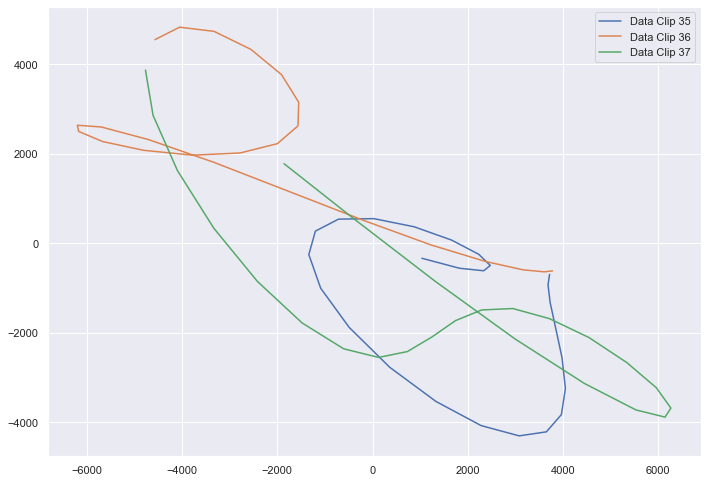

In [4]:
est_per = 25
num_test = 3
inital_clip = 35
end_clip = inital_clip+num_test

line_refernce = np.linspace(0,est_per,est_per)

for i in range (inital_clip,end_clip):
    plt.plot(TX_Q_data[i*est_per:(i+1)*(est_per)],RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay],    label='Data Clip {}'.format(i))  

#plt.step(line_refernce,np.squeeze(every_pure_input).T[0:test_size][0],label='Pure_Input')      
#plt.step(line_refernce, every_input[0:test_size],label='Curropted Signal') 
#plt.step(line_refernce,every_input[0:test_size],label='Input Signals After The Channels')       
plt.legend()

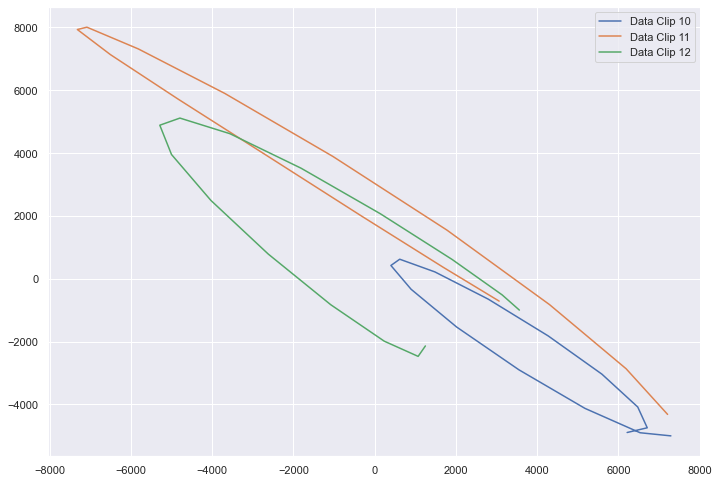

In [5]:
est_per = 15
num_test = 3
inital_clip = 10
end_clip = inital_clip+num_test

line_refernce = np.linspace(0,est_per,est_per)

for i in range (inital_clip,end_clip):
    plt.plot(TX_Q_data[i*est_per:(i+1)*(est_per)],RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay],    label='Data Clip {}'.format(i))  

#plt.step(line_refernce,np.squeeze(every_pure_input).T[0:test_size][0],label='Pure_Input')      
#plt.step(line_refernce, every_input[0:test_size],label='Curropted Signal') 
#plt.step(line_refernce,every_input[0:test_size],label='Input Signals After The Channels')       
plt.legend()

In [6]:
def generate_input(data,mem_len,test_size):
    every_input     = np.zeros((test_size+mem_len,mem_len))
    avilable_input  = np.zeros(mem_len)

    for k in range (mem_len):
        data = np.insert(data,0,0)

    for j in range (test_size):
        for i in range (mem_len):
            avilable_input[i] = data[j+i]
        every_input[j] = avilable_input

    return every_input 

In [7]:
every_input = generate_input(TX_Q_data[i*est_per:(i+1)*(est_per)],4,len(TX_Q_data[i*est_per:(i+1)*(est_per)]))

In [8]:
#Create and update pure signal
def update_avilable(every_input,coefficent_matrix,test_size):
    mem_dim = np.shape(coefficent_matrix)[0]
    degree_dim = np.shape(coefficent_matrix)[1]
    c = np.zeros((mem_dim,degree_dim))

    every_input = [0]
    every_pure_input = []

    for n in range(test_size):
        acc = 0
        for m in range(mem_dim):
            for k in range(degree_dim):
                acc = acc + coefficent_matrix[m][k]*(every_input[n][m]**k)
                #print(acc,"k =",k,"c=",c[m],"c[m]**k",c[m]**k)
        #avilable_input = avilable_input + 1
        #print("Input no[{}]-->".format(n), acc)
        
        every_input.append(acc)
        every_pure_input.append(c)
    
    line_refernce = np.linspace(0,test_size,test_size)
    plt.step(line_refernce,every_pure_input[0:test_size],label='Input Signals Before The Channels')    
    plt.step(line_refernce,every_input[0:test_size],label='Input Signals After The Channels')       
    plt.legend(["Pure","After Channels"])

    return every_input,every_pure_input

In [9]:
import RLS

##
##  Input Signal with a memory Generation Block
##

mem_len = 4
Degree = 5

coefficent_matrix = np.zeros((mem_len,Degree))
avilable_input = np.zeros((mem_len))

# Sample Cooefficent Matrix
coefficent_matrix[mem_len-1]    = [0.07, -1.9, 4.1, -10, 5]
coefficent_matrix[mem_len-2]    = [0.05, -2.6, -5.0, -14, -9]
# Sample Cooefficent Matrix
coefficent_matrix[mem_len-1]    = [0.07, -1.9, 4.1, -10, 5]
coefficent_matrix[mem_len-2]    = [0.05, -2.6, -5.0, -14, -9]


#Initate the input array with correct dimensions
for i in range(mem_len):
    avilable_input[i] = i


est_per  = 50
i = 5
#avilable_input    = TX_Q_data[i*est_per:(i+1)*(est_per)]
#test_size         = len(avilable_input)
#every_pure_input = RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay]
test_size = 150
#every_input,every_pure_input = RLS.update_signal(x=avilable_input,coefficent_matrix=coefficent_matrix,test_size=test_size)

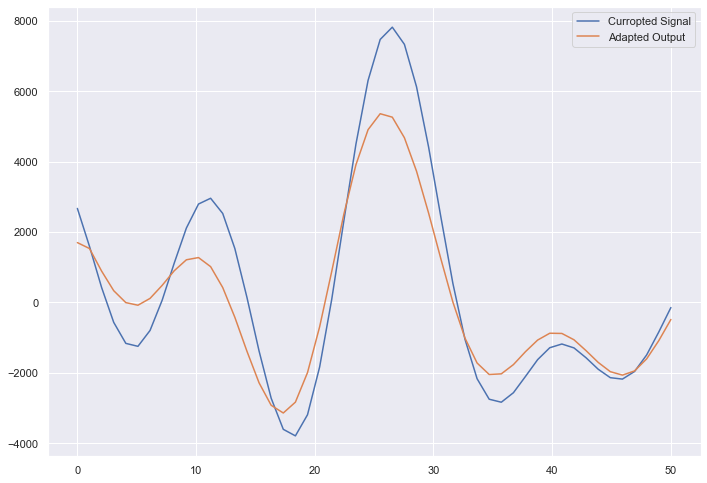

In [16]:
lam = 0.98
deg = 4
mem_len = 4
num_vars =deg*mem_len
test_size = len(TX_Q_data[i*est_per:(i+1)*(est_per)])
prediction = [0,1,2,3,4]
LS_2 = RLS.RLS_Filter(num_vars,lam,1)
i =5 

pred_e, pred_output = RLS.one_batch(test_size = test_size, deg = 4, mem_len = mem_len ,prediction = prediction,LS_2= LS_2 ,input_data=TX_Q_data[i*est_per:(i+1)*(est_per)],reference_data=RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay])

line_refernce = np.linspace(0,test_size,test_size) 
plt.plot(line_refernce,TX_Q_data[i*est_per:(i+1)*(est_per)],label='Curropted Signal') 
plt.plot(line_refernce,-np.squeeze(pred_output)[0:test_size],label='Adapted Output')       
plt.legend()

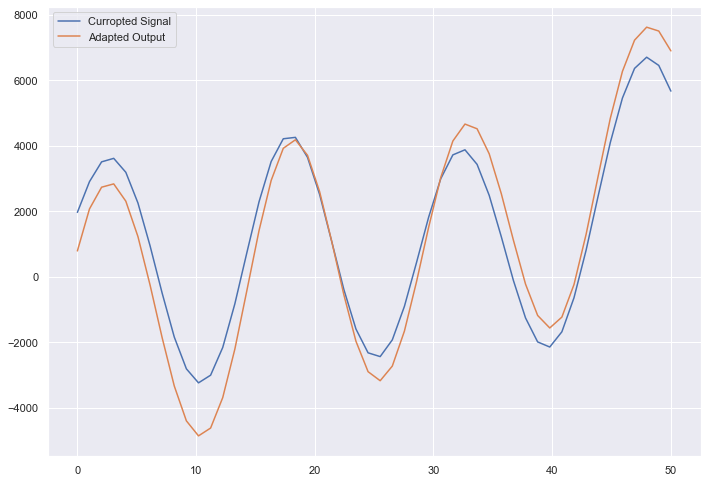

In [18]:
lam = 0.98
deg = 4
mem_len = 4
num_vars =deg*mem_len
test_size = len(TX_Q_data[i*est_per:(i+1)*(est_per)])
prediction = [0,1,2,3,4]
LS_2 = RLS.RLS_Filter(num_vars,lam,1)
i =40

pred_e, pred_output = RLS.one_batch(test_size = test_size, deg = 4, mem_len = mem_len ,prediction = prediction,LS_2= LS_2 ,input_data=TX_Q_data[i*est_per:(i+1)*(est_per)],reference_data=RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay])

line_refernce = np.linspace(0,test_size,test_size) 
plt.plot(line_refernce,TX_Q_data[i*est_per:(i+1)*(est_per)],label='Curropted Signal') 
plt.plot(line_refernce,-np.squeeze(pred_output)[0:test_size],label='Adapted Output')       
plt.legend()

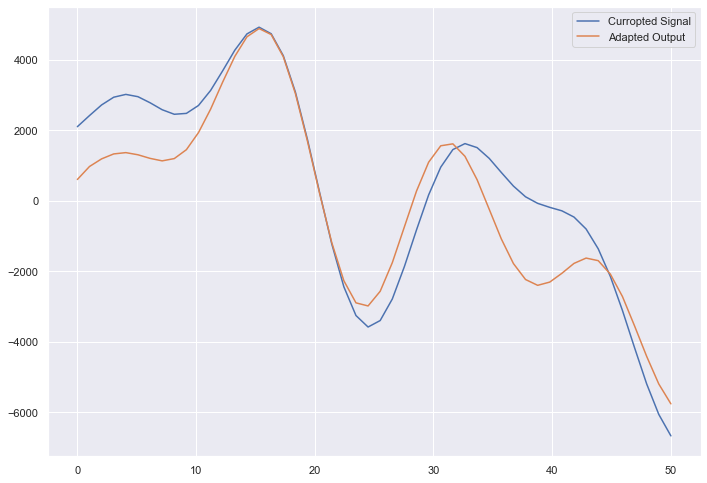

In [17]:
lam = 0.98
deg = 4
mem_len = 4
num_vars =deg*mem_len
test_size = len(TX_Q_data[i*est_per:(i+1)*(est_per)])
prediction = [0,1,2,3,4]
LS_2 = RLS.RLS_Filter(num_vars,lam,1)
i =10

pred_e, pred_output = RLS.one_batch(test_size = test_size, deg = 4, mem_len = mem_len ,prediction = prediction,LS_2= LS_2 ,input_data=TX_Q_data[i*est_per:(i+1)*(est_per)],reference_data=RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay])

line_refernce = np.linspace(0,test_size,test_size) 
plt.plot(line_refernce,TX_Q_data[i*est_per:(i+1)*(est_per)],label='Curropted Signal') 
plt.plot(line_refernce,-np.squeeze(pred_output)[0:test_size],label='Adapted Output')       
plt.legend()

In [11]:
np.shape(TX_Q_data[i*est_per:(i+1)*(est_per)])

(50, 1)

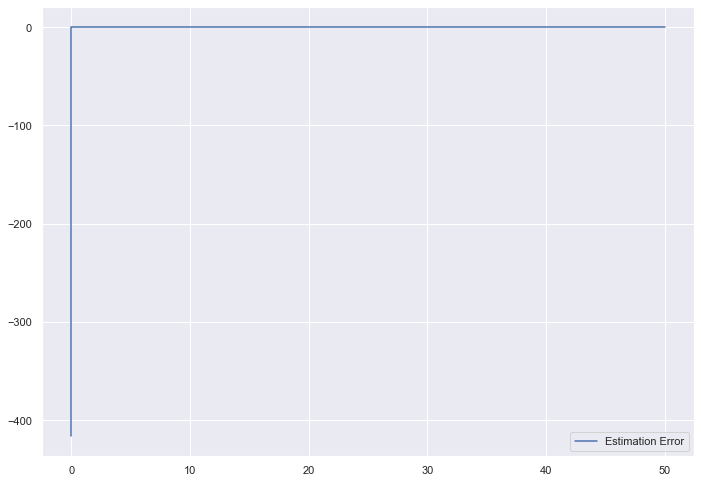

In [12]:
line_refernce = np.linspace(0,test_size,test_size)
plt.step(line_refernce,np.squeeze(pred_e)[0:test_size],    label='Estimation Error')  
#plt.step(line_refernce,np.squeeze(every_pure_input).T[0:test_size][0],label='Pure_Input')      
#plt.step(line_refernce, every_input[0:test_size],label='Curropted Signal') 
#plt.step(line_refernce,every_input[0:test_size],label='Input Signals After The Channels')       
plt.legend()

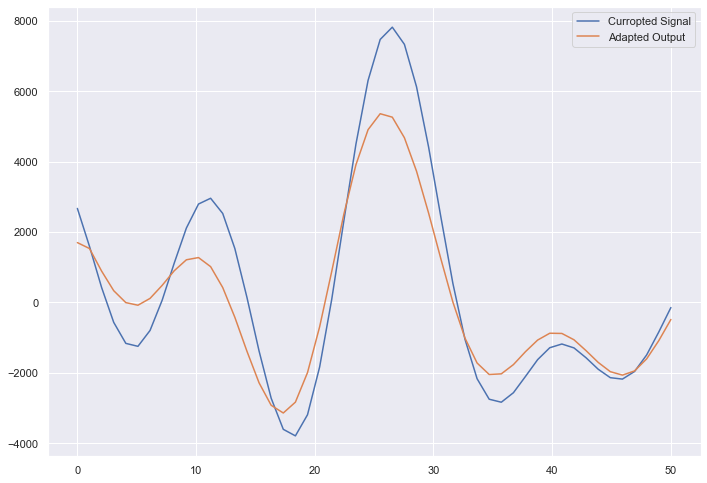

In [13]:
line_refernce = np.linspace(0,test_size,test_size) 
plt.plot(line_refernce,TX_Q_data[i*est_per:(i+1)*(est_per)],label='Curropted Signal') 
plt.plot(line_refernce,-np.squeeze(pred_output)[0:test_size],label='Adapted Output')       
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (50,) and (19, 4)

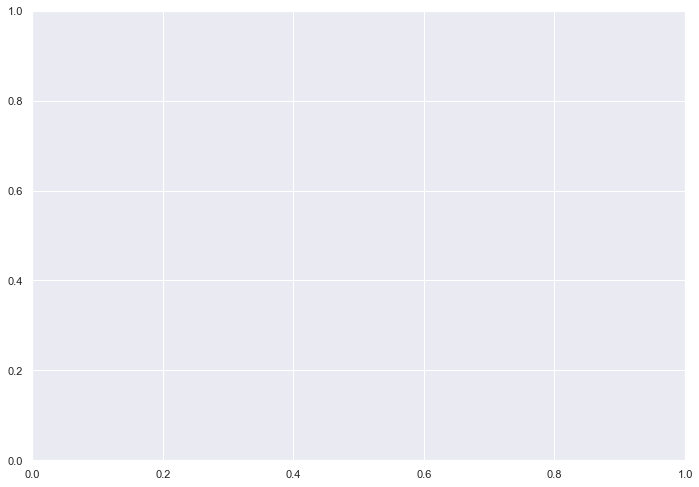

In [14]:
plt.plot(line_refernce,every_input[0:test_size],label='Curropted Signal') 
plt.plot(line_refernce,np.squeeze(pred_output)[0:test_size],label='Adapted Output')       

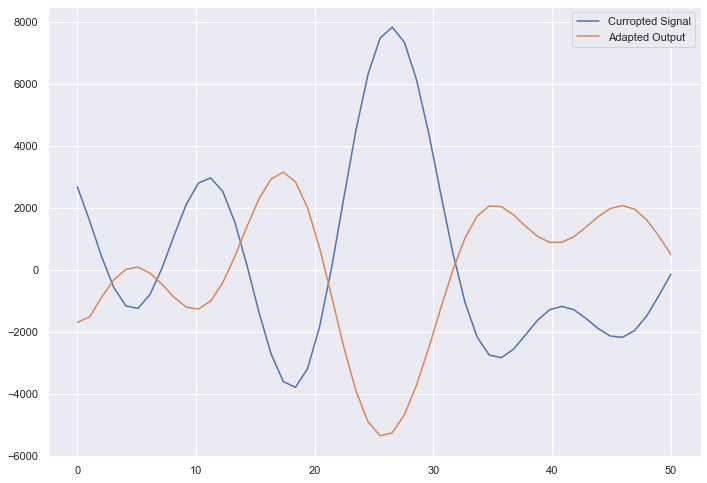

In [15]:
plt.plot(line_refernce,TX_Q_data[i*est_per:(i+1)*(est_per)],label='Curropted Signal') 
plt.plot(line_refernce,np.squeeze(pred_output)[0:test_size],label='Adapted Output') 
plt.legend()  